# Basic Visualization with Technical Indicators - NDX

This notebook demonstrates how to:
1. Load NDX (NASDAQ-100) data from the data collection module
2. Create charts with candlestick plots
3. Add technical indicators
4. Visualize trading data

**Data Source**: NDX data collected via YFinance and stored in `data_collection/data/1D/`

**Note**: This notebook displays the last year of data for better trend visualization.


In [1]:
import sys
from pathlib import Path

# Add project root to path
project_root = Path().resolve().parent
sys.path.insert(0, str(project_root))

import pandas as pd
from data_collection.data_collector import DataCollector
from data_collection.config_validation import validate_config
from data_collection.storage import CSVStorage
from visualization import Chart, SMA

## Load Data

Load data from storage using the DataCollector


In [2]:
# Configure data collector for NDX data
# Note: Data is stored in data_collection/data/ directory
# Use absolute path relative to project root
data_dir = project_root / "data_collection" / "data"

# Ensure the directory exists (create parent directories if needed)
data_dir.mkdir(parents=True, exist_ok=True)

config = {
    "data_sources": {
        "yfinance": {
            "type": "yfinance",
            "name": "YFinance",
            "rate_limit_calls": 30,
            "rate_limit_period": 60,
        }
    },
    "storage": {"base_dir": str(data_dir), "timeframes": ["1D"]},
    "enable_health_checks": True,
}

# Validate and create collector
validated_config = validate_config(config)
storage = CSVStorage(
    data_dir=str(data_dir),  # Use absolute path
    timeframes=config["storage"]["timeframes"],
)

collector = DataCollector(validated_config.data_sources, storage=storage)

# Load NDX data
symbol = "NDX"  # NASDAQ-100 Index
timeframe = "1D"  # Daily timeframe

df = collector.load_data(symbol, timeframe, source="YFinance")

if df is not None:
    print(f"Loaded {len(df)} data points for {symbol}")
    print(f"Date range: {df['timestamp'].min()} to {df['timestamp'].max()}")

    # Filter to last year of data
    from datetime import datetime, timedelta

    one_year_ago = datetime.now() - timedelta(days=365)
    df = df[df["timestamp"] >= one_year_ago]

    print(f"\nAfter filtering to last year: {len(df)} data points")
    print(f"Filtered date range: {df['timestamp'].min()} to {df['timestamp'].max()}")
    print(f"\nColumns: {list(df.columns)}")
    print(f"\nFirst few rows:")
    print(df.head())
    print(f"\nLast few rows:")
    print(df.tail())
else:
    print(f"No data found for {symbol} ({timeframe})")
    print("You may need to collect data first using collector.collect_and_store()")

Loaded 251 data points for NDX
Date range: 2024-12-04 00:00:00 to 2025-12-04 00:00:00

After filtering to last year: 250 data points
Filtered date range: 2024-12-05 00:00:00 to 2025-12-04 00:00:00

Columns: ['symbol', 'timeframe', 'source', 'timestamp', 'openPrice', 'highPrice', 'lowPrice', 'closePrice', 'lastTradedVolume', 'metadata', 'checksum']

First few rows:
  symbol timeframe    source  timestamp  openPrice  highPrice  lowPrice  \
1    NDX        1D  YFinance 2024-12-05    21488.5    21517.5   21411.5   
2    NDX        1D  YFinance 2024-12-06    21458.6    21626.3   21449.6   
3    NDX        1D  YFinance 2024-12-09    21573.8    21610.0   21400.8   
4    NDX        1D  YFinance 2024-12-10    21492.5    21567.0   21313.3   
5    NDX        1D  YFinance 2024-12-11    21540.4    21784.7   21533.9   

   closePrice  lastTradedVolume                                 metadata  \
1     21425.2      7.229510e+09  {'dividends': 0.0, 'stock_splits': 0.0}   
2     21622.2      6.787610e+0

## Basic Chart

Create a basic candlestick chart


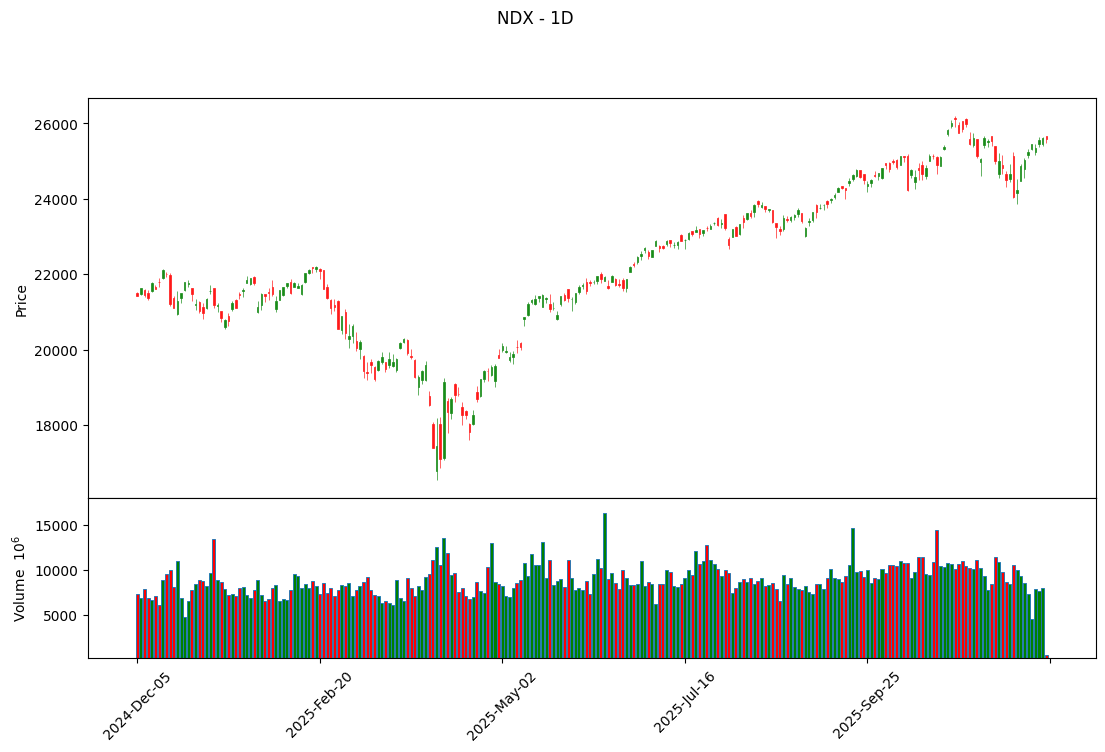

In [3]:
if df is not None:
    chart = Chart(df, symbol=symbol, timeframe=timeframe)
    chart.plot(type="candle", volume=True, figsize=(14, 8))

## Chart with Moving Averages

Add Simple Moving Averages (SMA 20, 50, 100) with different colors


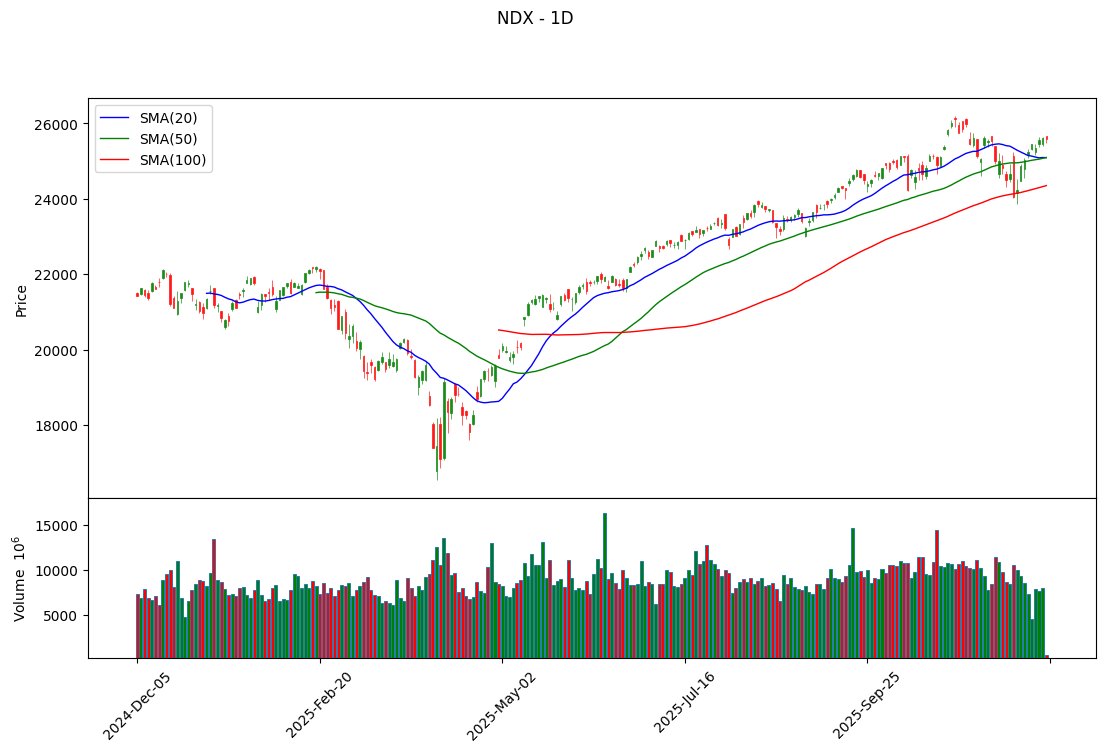

In [4]:
if df is not None:
    chart = Chart(df, symbol=symbol, timeframe=timeframe)
    chart.add_indicator(SMA(period=20, color="blue"))
    chart.add_indicator(SMA(period=50, color="green"))
    chart.add_indicator(SMA(period=100, color="red"))
    chart.plot(type="candle", volume=True, figsize=(14, 8))

## Chart with SMA Indicators

Display SMA 20 (blue), 50 (green), and 100 (red) on the chart


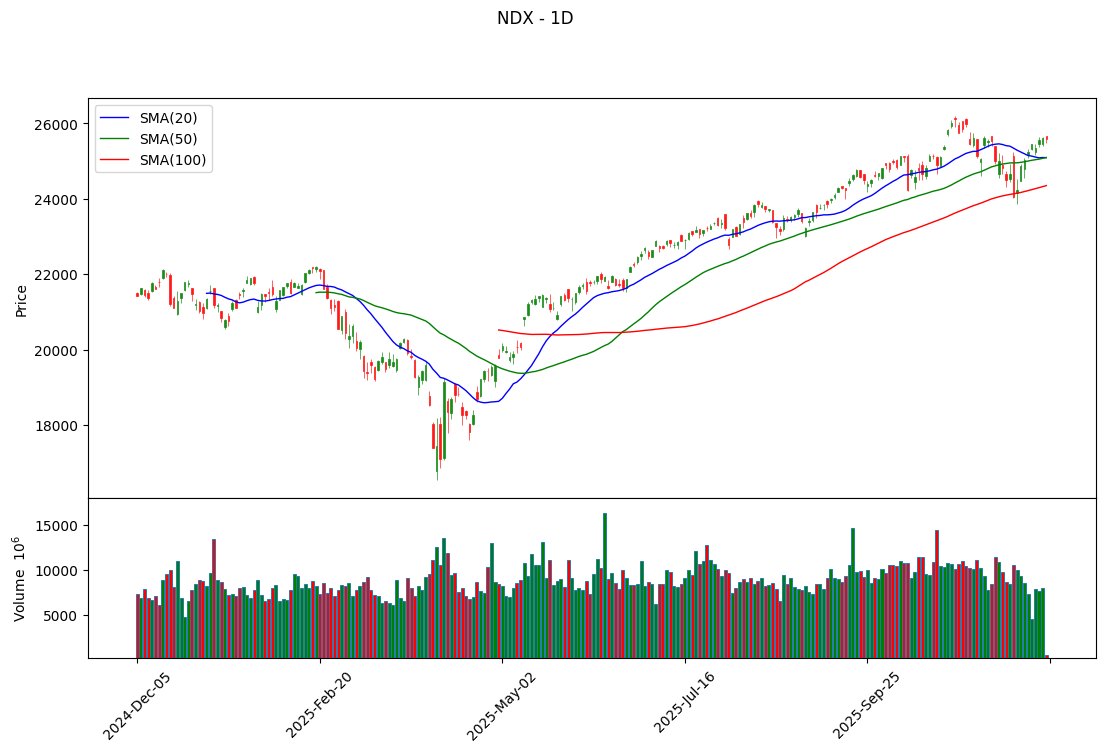

In [5]:
if df is not None:
    chart = Chart(df, symbol=symbol, timeframe=timeframe)

    # Moving averages: SMA 20 (blue), 50 (green), 100 (red)
    chart.add_indicator(SMA(period=20, color="blue"))
    chart.add_indicator(SMA(period=50, color="green"))
    chart.add_indicator(SMA(period=100, color="red"))

    chart.plot(type="candle", volume=True, figsize=(14, 8))

## Access Indicator Data

Get the DataFrame with all calculated SMA indicators


In [6]:
if df is not None:
    chart = Chart(df, symbol=symbol, timeframe=timeframe)
    chart.add_indicator(SMA(period=20, color="blue"))
    chart.add_indicator(SMA(period=50, color="green"))
    chart.add_indicator(SMA(period=100, color="red"))

    # Get data with indicators
    data_with_indicators = chart.get_data()

    print("Columns with indicators:")
    print(list(data_with_indicators.columns))
    print("\nLast few rows:")
    print(data_with_indicators.tail())

Columns with indicators:
['symbol', 'timeframe', 'source', 'open', 'high', 'low', 'close', 'volume', 'metadata', 'checksum', 'sma_20', 'sma_50', 'sma_100']

Last few rows:
           symbol timeframe    source     open     high      low    close  \
timestamp                                                                   
2025-11-28    NDX        1D  YFinance  25310.3  25435.8  25281.0  25434.9   
2025-12-01    NDX        1D  YFinance  25232.8  25443.2  25158.6  25342.8   
2025-12-02    NDX        1D  YFinance  25449.9  25622.6  25369.4  25555.9   
2025-12-03    NDX        1D  YFinance  25443.7  25640.0  25388.4  25606.5   
2025-12-04    NDX        1D  YFinance  25658.1  25658.3  25468.5  25579.7   

                  volume                                 metadata  checksum  \
timestamp                                                                     
2025-11-28  4.541070e+09  {'dividends': 0.0, 'stock_splits': 0.0}  8c93395b   
2025-12-01  7.859560e+09  {'dividends': 0.0, 'stock

## Save Chart with SMA Indicators

Save the chart with SMA 20, 50, 100 to a file


In [7]:
if df is not None:
    chart = Chart(df, symbol=symbol, timeframe=timeframe)
    chart.add_indicator(SMA(period=20, color="blue"))
    chart.add_indicator(SMA(period=50, color="green"))
    chart.add_indicator(SMA(period=100, color="red"))

    # Save to file
    chart.plot(
        type="candle",
        volume=True,
        figsize=(14, 8),
        savefig=f"{symbol}_{timeframe}_chart.png",
        show=True,
    )

In [8]:
# Cleanup
collector.disconnect_all()